In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
x_train[0].shape

(32, 32, 3)

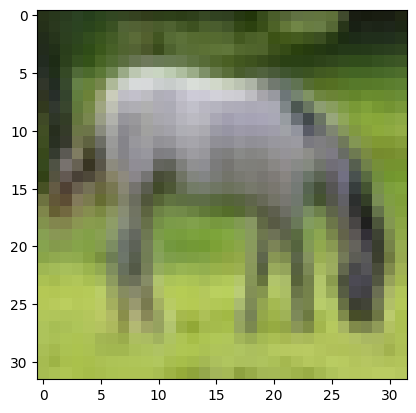

In [8]:
plt.imshow(x_train[87])

In [9]:
x_train[0].max()

np.uint8(255)

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
y_cat_test = to_categorical(y_test,10)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [22]:
model.fit(x_train,y_cat_train,epochs=15, validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3674 - loss: 1.7235 - val_accuracy: 0.5228 - val_loss: 1.3257
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5603 - loss: 1.2452 - val_accuracy: 0.5986 - val_loss: 1.1388
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6280 - loss: 1.0601 - val_accuracy: 0.6401 - val_loss: 1.0377
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6724 - loss: 0.9409 - val_accuracy: 0.6500 - val_loss: 0.9878
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7016 - loss: 0.8475 - val_accuracy: 0.6699 - val_loss: 0.9528
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7282 - loss: 0.7814 - val_accuracy: 0.6723 - val_loss: 0.9616
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7560 - loss: 0.6918 - val_accuracy: 0.6767 - val_loss: 0.9547


In [23]:
metrics = pd.DataFrame(model.history.history)

In [24]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.44526,1.530345,0.5228,1.325720
1,0.57514,1.206130,0.5986,1.138771
2,0.63168,1.051941,0.6401,1.037731
3,0.67260,0.940079,0.6500,0.987839
4,0.69890,0.855246,0.6699,0.952782
5,0.72806,0.778889,0.6723,0.961556
6,0.74836,0.715561,0.6767,0.954741


<Axes: >

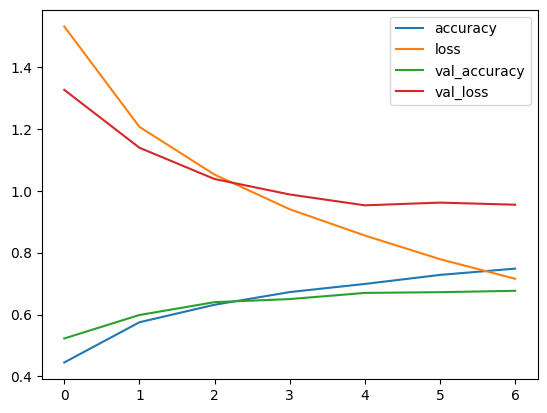

In [25]:
metrics.plot()

<Axes: >

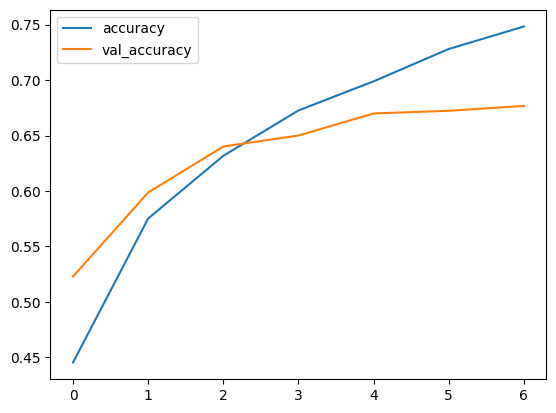

In [26]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

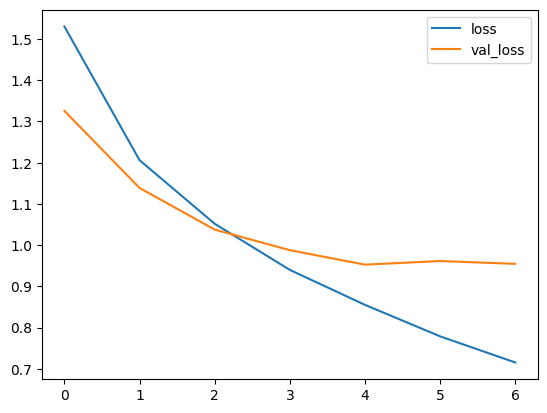

In [27]:
metrics[['loss','val_loss']].plot()

In [28]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9547409415245056, 0.6766999959945679]

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.58      0.55      0.56      1000
           3       0.51      0.46      0.48      1000
           4       0.59      0.67      0.63      1000
           5       0.63      0.51      0.56      1000
           6       0.71      0.80      0.75      1000
           7       0.64      0.80      0.71      1000
           8       0.78      0.77      0.77      1000
           9       0.79      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [32]:
import seaborn as sns

<Axes: >

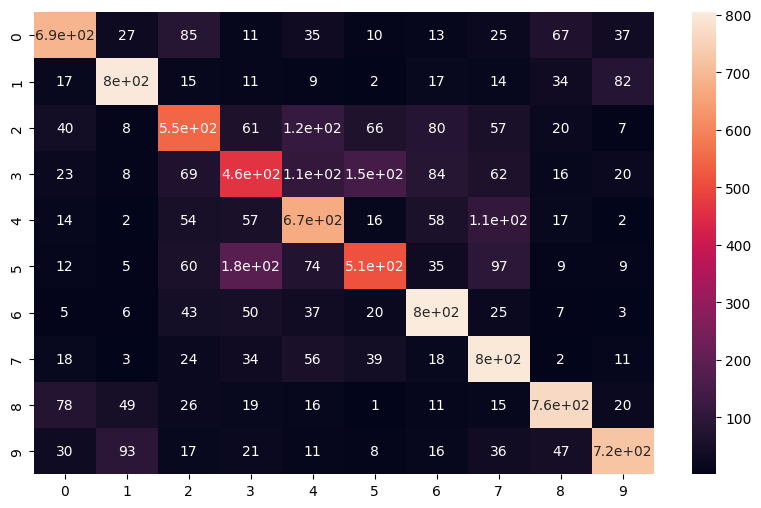

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [34]:
my_image = x_test[0]

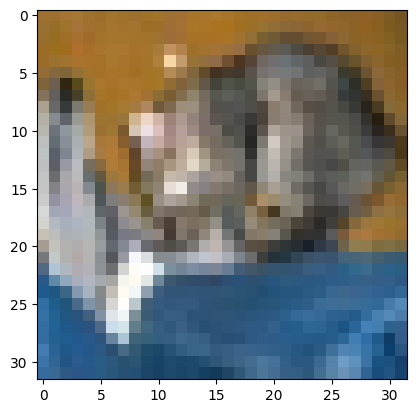

In [35]:
plt.imshow(my_image)

In [36]:
y_test[0]

array([3], dtype=uint8)

In [37]:
np.argmax(
    model.predict(my_image.reshape(1, 32, 32, 3)),
    axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([3])

In [39]:
my_image1 = x_test[29]

In [40]:
y_test[29]

array([6], dtype=uint8)

In [41]:
np.argmax(
    model.predict(my_image1.reshape(1, 32, 32, 3)),
    axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([6])

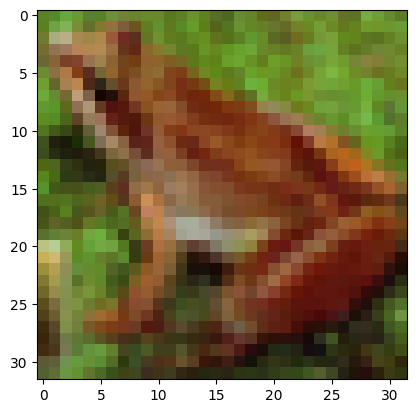

In [43]:
plt.imshow(my_image1)